In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

## 이 밖에도 필요한 library를 import 해봅시다.

In [2]:
# 1. 샘플 데이터 생성
def create_sample_data():
    # 랜덤 데이터 생성 (3개의 군집)
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
    
    # 노이즈 데이터 추가
    noise = np.random.uniform(low=-3, high=3, size=(50, 2))
    X = np.vstack([X, noise])
    
    return X

In [3]:
# 2. DBSCAN 실행 함수
def run_dbscan(X, eps=0.3, min_samples=5):
    # 데이터 스케일링
    X_scaled = StandardScaler().fit_transform(X)
    
    # DBSCAN 모델 생성 및 학습
    db = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = db.fit_predict(X_scaled)
    
    return X_scaled, clusters

In [4]:
# 3. 결과 시각화 함수
def visualize_clusters(X, clusters):
    plt.figure(figsize=(10, 6))
    
    # 클러스터별로 다른 색상 지정
    unique_clusters = np.unique(clusters)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))
    
    # 각 클러스터 그리기
    for cluster, col in zip(unique_clusters, colors):
        if cluster == -1:  # 노이즈 포인트
            col = 'gray'
        mask = (clusters == cluster)
        plt.scatter(X[mask, 0], X[mask, 1], c=[col], label=f'클러스터 {cluster}')
    
    plt.title('DBSCAN 클러스터링 결과')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
from sklearn.metrics import silhouette_score as sk_silhouette_score;

# 4. 실루엣 스코어 함수
def silhouette_score(y_true, y_pred):
    n_samples = len(y_true)
    
    distances = pairwise_distances(y_true)
    
    a = np.zeros(n_samples)
    for i in range(n_samples):
        same_cluster_mask = (y_pred == y_pred[i])
        a[i] = np.mean(distances[i][same_cluster_mask])

    b = np.zeros(n_samples)
    unique_clusters = np.unique(y_pred)
    for i in range(n_samples):
        other_clusters = unique_clusters[unique_clusters != y_pred[i]]
        b[i] = np.min([np.mean(distances[i][y_pred == cluster]) for cluster in other_clusters])

    s = (b - a) / np.maximum(a, b)
    
    return np.mean(s)

1. 샘플 데이터를 생성합니다...
2. DBSCAN을 실행합니다...
발견된 클러스터 수: 2
노이즈 포인트 수: 35
4. 결과를 시각화합니다...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versio

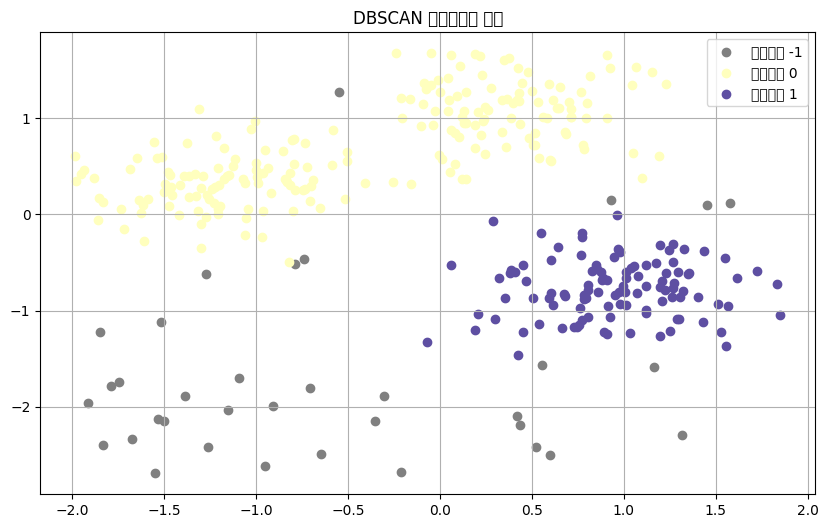

5. 실루엣 계수를 구합니다...


np.float64(0.4890833380679821)

In [6]:
    

# 1. 데이터 생성
print("1. 샘플 데이터를 생성합니다...")
X = create_sample_data()


# 2. DBSCAN 실행
print("2. DBSCAN을 실행합니다...")
eps = 0.3  # epsilon 값 (이웃 반경)
min_samples = 5  # 최소 데이터 개수
X_scaled, clusters = run_dbscan(X, eps, min_samples)

# 3. 결과 확인
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"발견된 클러스터 수: {n_clusters}")
print(f"노이즈 포인트 수: {n_noise}")

# 4. 시각화
print("4. 결과를 시각화합니다...")
visualize_clusters(X_scaled, clusters)

# 5. 실루엣 계수
print("5. 실루엣 계수를 구합니다...")
silhouette_score(X_scaled, clusters)